In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cebra
import cebra.datasets
from cebra import CEBRA


In [ ]:
from torch.utils.data import Dataset, DataLoader
import torch

class TestWeatherDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)  # Ensure tensor is of type float
        self.labels = torch.tensor(labels, dtype=torch.float32)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, index):
        return self.features[index], self.labels[index]

# Assuming test_x and test_y are numpy arrays from your split
test_dataset = TestWeatherDataset(test_input_tensor, test_target_tensor)
# Create a DataLoader that processes larger chunks or the entire dataset
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)  # for the whole dataset at once


C:\Users\user\AppData\Local\Temp\ipykernel_1116\3461308117.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.features = torch.tensor(features, dtype=torch.float32)  # Ensure tensor is of type float
C:\Users\user\AppData\Local\Temp\ipykernel_1116\3461308117.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.labels = torch.tensor(labels, dtype=torch.float32)


### 1. Load in Mthal data 
- CEBRA models 
- corrisponding embeddings (create from models and neural data)
- discerte_lables (what was used to train the model)
###### Neural Data
- neural_data (all nerual data (100%) full recording), 
- neural_train (neural data seperated into training group (80% of neural_data) that made corresponding cebra model)
- neural_test (neural data seperated into test group (20% of neural_data) that made corresponding cebra model)

In [35]:
mouse = 'reach1_4'

In [36]:
# variables to load different models and neural data
num_reaches = 278
probe = 'B' # probe used for the neural data
bin_size_in_ms = 50 # in milliseconds
output_dimension = 32 # number of dimensions for the embeddingspre
pre_reach = 1
post_reach = 10

load full neural_data

In [37]:
pre_reach_str = str(pre_reach)
if pre_reach < 1:
    window_size = f'{pre_reach_str[0]}{pre_reach_str[-1]}_{post_reach}_timeWindow'
if pre_reach >= 1:
    window_size = f'{pre_reach_str}_{post_reach}_timeWindow'
targets
# load the neural data
neural_data = cebra.load_data(neural_data_path)
print(neural_data.shape)
neural_data_transposed = neural_data.T  # This changes shape to (58380, 538)
print(neural_data_transposed.shape)

NameError: name 'targets' is not defined

load neural data (train and test)

In [ ]:
path_ = f'train_test_data/{mouse}_neural_train.npy'
neural_train = np.load(path_)

path_ = f'train_test_data/{mouse}_neural_test.npy'
neural_test = np.load(path_)

path_ = f'train_test_data/{mouse}_label_train.npy'
label_train = np.load(path_)

path_ = f'train_test_data/{mouse}_label_test.npy'
label_test = np.load(path_)

neural_train.shape, neural_test.shape, label_train.shape, label_test.shape

((48928, 538), (12232, 538), (48928, 2), (12232, 2))

load cebra models and make embeddings

In [38]:
MI = 5000 # maximum number of iterations
OD =32 # output dimension
P = 'B' # probe letter

In [39]:
# We get train set embedding and test set embedding.
cebra_posdir_model = cebra.CEBRA.load(f"cebra_models/reach1_4/01/B/cebra_trialID_SucessFailure_model_{MI}_{OD}_{mouse}_{P}.pt")
cebra_posdir_train = cebra_posdir_model.transform(neural_train)
cebra_posdir_test = cebra_posdir_model.transform(neural_test)

cebra_pos_model = cebra.CEBRA.load(f"cebra_models/reach1_4/01/B/cebra_trialID_model_{MI}_{OD}_{mouse}_{P}.pt")
cebra_pos_train = cebra_pos_model.transform(neural_train)
cebra_pos_test = cebra_pos_model.transform(neural_test)

cebra_dir_model = cebra.CEBRA.load(f"cebra_models/reach1_4/01/B/cebra_SucessFailure_model_{MI}_{OD}_{mouse}_{P}.pt")
cebra_dir_train = cebra_dir_model.transform(neural_train)
cebra_dir_test = cebra_dir_model.transform(neural_test)

cebra_pos_all = cebra_pos_model.transform(neural_data_transposed)
cebra_dir_all = cebra_dir_model.transform(neural_data_transposed)
cebra_posdir_all = cebra_posdir_model.transform(neural_data_transposed)


RuntimeError: Given groups=1, weight of size [32, 538, 2], expected input[1, 45, 48937] to have 538 channels, but got 45 channels instead

load discerte_lables 

In [ ]:
load_path = f'discrete_lables/{mouse}_trial_ID_SF.npy'
discrete_labled_loaded = np.load(load_path)
discete_lables = discrete_labled_loaded
discete_lables.shape
np.unique(discete_lables[:,0]), np.unique(discete_lables[:,1])

(array([0., 1., 2.]), array([0., 1.]))

preview embeddings

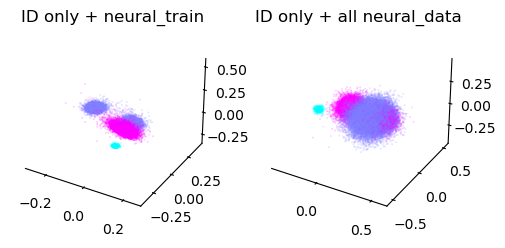

((48928, 32), (61160, 32))

In [ ]:
fig=plt.figure(figsize=(9,6))

ax1=plt.subplot(231, projection = '3d')
ax2=plt.subplot(232, projection = '3d')

ax1=cebra.plot_embedding(ax=ax1, embedding=cebra_posdir_train, embedding_labels=label_train[:,0], title='ID only + neural_train')
ax2=cebra.plot_embedding(ax=ax2, embedding=cebra_pos_all, embedding_labels=discete_lables[:,0], title='ID only + all neural_data')

plt.show()
cebra_posdir_train.shape, cebra_pos_all.shape

load cebra-time models (not trained with lables)

In [40]:
path_0 = "reach1_4_50msFr_0.001LR_1000MI_outDim32_B_2024-03-29_19-31-13_timeOnly.cebra"
path_0 = 'reach1_4_50msFr_0.001LR_1500MI_outDim32_B_2024-04-02_13-07-00_timeOnly.cebra'

cebra_time_model = cebra.CEBRA.load(f'time_only_models/{path_0}')
cebra_time_all = cebra_time_model.transform(neural_data_transposed)
cebra_time_train = cebra_time_model.transform(neural_train)
cebra_time_test = cebra_time_model.transform(neural_test)

plt.figure(figsize=(10, 6))
#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(231, projection='3d')  # First row, first column
ax2 = plt.subplot(232, projection='3d')  # First row, second column
ax3 = plt.subplot(233, projection='3d')  # First row, second column
ax4 = plt.subplot(234, projection='3d')  # First row, second column
ax5 = plt.subplot(235, projection='3d')  # First row, second column
ax6 = plt.subplot(236, projection='3d')  # First row, second column


ax1 = cebra.plot_embedding(ax=ax1,embedding=cebra_time_all, embedding_labels='time', title='all')
ax2 = cebra.plot_embedding(ax=ax2,embedding=cebra_time_train, embedding_labels='time', title='train')
ax3 = cebra.plot_embedding(ax=ax3,embedding=cebra_time_test, embedding_labels='time', title='test')
ax4 = cebra.plot_embedding(ax=ax4,embedding=cebra_time_all, embedding_labels=discete_lables[:,0], title='all')
ax5 = cebra.plot_embedding(ax=ax5,embedding=cebra_time_train, embedding_labels=label_train[:,0], title='train')
ax6 = cebra.plot_embedding(ax=ax6,embedding=cebra_time_test, embedding_labels=label_test[:,0], title='test')
# add title
plt.suptitle('CEBRA-Time Model, Mthal')

RuntimeError: Given groups=1, weight of size [32, 538, 2], expected input[1, 45, 61169] to have 538 channels, but got 45 channels instead

In [ ]:
mthal_embedding_train = cebra_time_train
mthal_embedding_all = cebra_time_all

### 1.2 Load in M1 data 


In [ ]:
probe = 'A' # probe used for the neural data
P = probe

load full neural data

In [41]:
pre_reach_str = str(pre_reach)
if pre_reach < 1:
    window_size = f'{pre_reach_str[0]}{pre_reach_str[-1]}_{post_reach}_timeWindow'
if pre_reach >= 1:
    window_size = f'{pre_reach_str}_{post_reach}_timeWindow'

# the path to the .npy file for the neural data (structred as firing rates x time x neurons)
neural_data_path =f'neural_data/{mouse}_{bin_size_in_ms}ms_FR_{window_size}_{probe}.npy'

# load the neural data
neural_data = cebra.load_data(neural_data_path)
print(neural_data.shape)
neural_data_transposed = neural_data.T  # This changes shape to (58380, 538)
print(neural_data_transposed.shape)

(538, 61160)
(61160, 538)


load neural_data (test and train)

In [42]:
def split_data(data, test_ratio):

    split_idx = int(len(data)* (1-test_ratio))
    neural_train = neural_data_transposed[:split_idx]
    neural_test = neural_data_transposed[split_idx:]
    label_train = discete_lables[:split_idx]
    label_test = discete_lables[split_idx:]

    return neural_train, neural_test, label_train, label_test

neural_train, neural_test, label_train, label_test = split_data(neural_data_transposed, 0.2)
neural_train.shape, neural_test.shape, label_train.shape, label_test.shape

((48928, 538), (12232, 538), (48928, 2), (12232, 2))

load cebra models and make embeddings

In [43]:
MI = 5000 # maximum number of iterations
OD =32 # output dimension
P = 'A' # probe letter

In [44]:
np.unique(label_train[:,0]), np.unique(label_train[:,1])

(array([0., 1., 2.]), array([0., 1.]))

In [45]:
# We get train set embedding and test set embedding.
cebra_posdir_model = cebra.CEBRA.load(f"cebra_models/reach1_4/01/A/cebra_trialID_SucessFailure_model_{MI}_{OD}_{mouse}_{P}_02.pt")
cebra_posdir_train = cebra_posdir_model.transform(neural_train)
cebra_posdir_test = cebra_posdir_model.transform(neural_test)

cebra_pos_model = cebra.CEBRA.load(f"cebra_models/reach1_4/01/A/cebra_trialID_model_{MI}_{OD}_{mouse}_{P}_02.pt")
cebra_pos_train = cebra_pos_model.transform(neural_train)
cebra_pos_test = cebra_pos_model.transform(neural_test)

cebra_dir_model = cebra.CEBRA.load(f"cebra_models/reach1_4/01/A/cebra_SucessFailure_model_{MI}_{OD}_{mouse}_{P}_02.pt")
cebra_dir_train = cebra_dir_model.transform(neural_train)
cebra_dir_test = cebra_dir_model.transform(neural_test)

cebra_pos_all = cebra_pos_model.transform(neural_data_transposed)
cebra_dir_all = cebra_dir_model.transform(neural_data_transposed)
cebra_posdir_all = cebra_posdir_model.transform(neural_data_transposed)

RuntimeError: Given groups=1, weight of size [32, 45, 2], expected input[1, 538, 48937] to have 45 channels, but got 538 channels instead

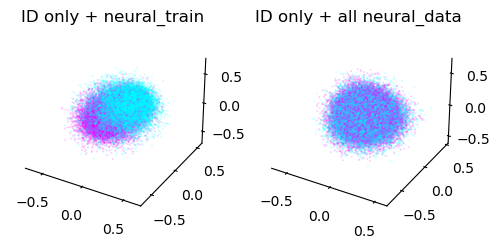

((48928, 32), (61160, 32))

In [ ]:
fig=plt.figure(figsize=(9,6))

ax1=plt.subplot(231, projection = '3d')
ax2=plt.subplot(232, projection = '3d')

ax1=cebra.plot_embedding(ax=ax1, embedding=cebra_posdir_train, embedding_labels=label_train[:,1], title='ID only + neural_train')
ax2=cebra.plot_embedding(ax=ax2, embedding=cebra_pos_all, embedding_labels=discete_lables[:,1], title='ID only + all neural_data')

plt.show()
cebra_posdir_train.shape, cebra_pos_all.shape

In [ ]:
m1_embedding_train= cebra_posdir_train
m1_embedding_all = cebra_pos_all

Text(0.5, 0.98, 'CEBRA-Time Model, M1')

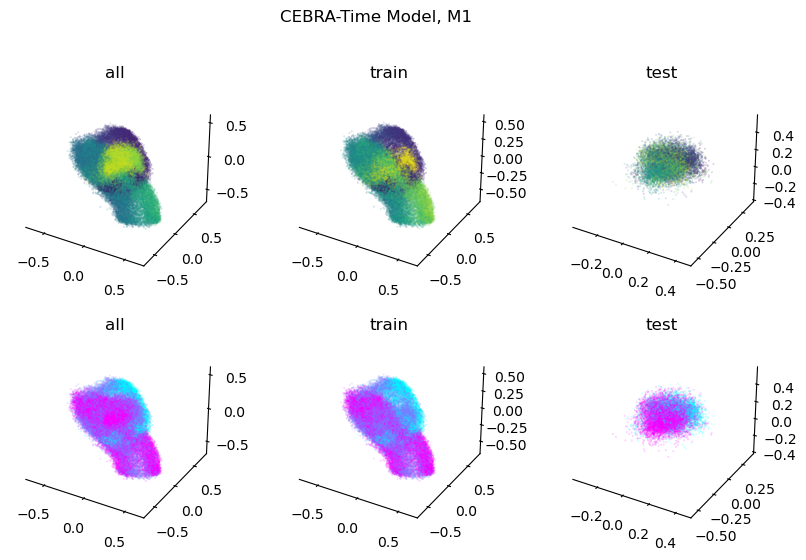

In [ ]:
path_0 = 'reach1_4_50msFr_0.001LR_1500MI_outDim20_A_2024-04-01_18-58-59_timeOnly.cebra'

cebra_time_model = cebra.CEBRA.load(f'time_only_models/{path_0}')
cebra_time_all = cebra_time_model.transform(neural_data_transposed)
cebra_time_train = cebra_time_model.transform(neural_train)
cebra_time_test = cebra_time_model.transform(neural_test)

plt.figure(figsize=(10, 6))
#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(231, projection='3d')  # First row, first column
ax2 = plt.subplot(232, projection='3d')  # First row, second column
ax3 = plt.subplot(233, projection='3d')  # First row, second column
ax4 = plt.subplot(234, projection='3d')  # First row, second column
ax5 = plt.subplot(235, projection='3d')  # First row, second column
ax6 = plt.subplot(236, projection='3d')  # First row, second column


ax1 = cebra.plot_embedding(ax=ax1,embedding=cebra_time_all, embedding_labels='time', title='all')
ax2 = cebra.plot_embedding(ax=ax2,embedding=cebra_time_train, embedding_labels='time', title='train')
ax3 = cebra.plot_embedding(ax=ax3,embedding=cebra_time_test, embedding_labels='time', title='test')
ax4 = cebra.plot_embedding(ax=ax4,embedding=cebra_time_all, embedding_labels=discete_lables[:,0], title='all')
ax5 = cebra.plot_embedding(ax=ax5,embedding=cebra_time_train, embedding_labels=label_train[:,0], title='train')
ax6 = cebra.plot_embedding(ax=ax6,embedding=cebra_time_test, embedding_labels=label_test[:,0], title='test')
# add title
plt.suptitle('CEBRA-Time Model, M1')

In [ ]:
m1_embedding_train = cebra_time_train
m1_embedding_all = cebra_time_all


### 2. Construct RNN

In [46]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split


prepare input and target data

In [47]:
input = mthal_embedding_all
target = m1_embedding_all
input.shape, target.shape   

((61160, 32), (61160, 20))

In [48]:
# Slice to keep only the first 20 columns
input = input[:, :20]

In [49]:
# Assuming input and target are numpy arrays or PyTorch tensors of shape (48928, 32)
# First, calculate the number of complete reaches in the training set
num_reaches_train = 278   # Calculate 80% of reaches for training
print(num_reaches_train)
# Since each reach has 210 time bins, calculate the total number of bins used for training
total_bins_train = int(num_reaches_train * 220)  # Make sure to use int for exact number conversion

# Now reshape input and target tensors for the training set
input_tensor = torch.tensor(input[:total_bins_train]).reshape(-1, 220, 20)  # Reshape to (222, 210, 32)
target_tensor = torch.tensor(target[:total_bins_train]).reshape(-1, 220, 20)  # Reshape to (222, 210, 32)

# Convert the existing tensors to float32 if they are not already
input_tensor = input_tensor.float()
target_tensor = target_tensor.float()


# Create a TensorDataset
train_dataset = TensorDataset(input_tensor, target_tensor)


# Optionally create a validation dataset using the remaining data if needed
input_tensor.shape, target_tensor.shape

278


(torch.Size([278, 220, 20]), torch.Size([278, 220, 20]))

In [50]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and validation sets
train_spikes, valid_spikes = train_test_split(input_tensor, test_size=0.2, random_state=42)
train_spikes.shape, valid_spikes.shape

(torch.Size([222, 220, 20]), torch.Size([56, 220, 20]))

In [51]:
print(f'reach trials for training: {train_spikes.shape[0]}')
print(f'reach trials for validation: {valid_spikes.shape[0]}')
print(f'embedding values per time bin: {train_spikes.shape[2]}')
print(f'time bins per reach: {train_spikes.shape[1]}')

reach trials for training: 222
reach trials for validation: 56
embedding values per time bin: 20
time bins per reach: 220


PyTorch rnn

In [29]:
from torch.utils.data import Dataset, DataLoader

class NeuralDataset(Dataset):
    def __init__(self, data, labels=None):
        self.data = torch.tensor(data, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.float32) if labels is not None else None

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, idx):
        if self.labels is not None:
            return self.data[idx], self.labels[idx]
        return self.data[idx]

# Example loading
# Assuming you've split your data already into training and validation sets
train_data = NeuralDataset(train_spikes)  # train_spikes would be a subset of your data
valid_data = NeuralDataset(valid_spikes)

train_loader = DataLoader(train_data, batch_size=1, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=1, shuffle=False)



C:\Users\user\AppData\Local\Temp\ipykernel_4396\212373488.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.data = torch.tensor(data, dtype=torch.float32)


In [30]:
import torch
from torch import nn
# Setup the device
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Forward pass through RNN
        x, _ = self.rnn(x)
        # Taking the last timestep output
        x = self.fc(x[:, -1, :])
        return x

# Parameters
input_size = 20  # Number of neural units
hidden_size = 100  # Size of RNN hidden state
output_size = 1  # Adjust depending on what you're predicting, e.g., behavior outcome

# Instantiate the model
model = SimpleRNN(input_size, hidden_size, output_size).to(DEVICE)

In [31]:
loss_fn = nn.MSELoss()  # If it's a regression problem; change if it's classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Using Adam as it generally performs well


### 3. Train RNN 
- Input: Mthal embedding data
- Targert: M1 embedding data
- Output: Predicted M1 embedding data

In [34]:
def train_model(model, train_loader, valid_loader, loss_fn, optimizer, epochs=50):
    for epoch in range(epochs):
        model.train()  # Set model to training mode
        train_loss = 0
        
        for sequences in train_loader:
            sequences = sequences.to(DEVICE)
            optimizer.zero_grad()
            predictions = model(sequences)
            loss = loss_fn(predictions, sequences[:, -1, :])  # Example: predict the last timestep
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        valid_loss = 0
        model.eval()  # Set model to evaluation mode
        with torch.no_grad():
            for sequences in valid_loader:
                sequences = sequences.to(DEVICE)
                predictions = model(sequences)
                loss = loss_fn(predictions, sequences[:, -1, :])
                valid_loss += loss.item()
        
        print(f'Epoch {epoch + 1}, Train Loss: {train_loss / len(train_loader)}, Validation Loss: {valid_loss / len(valid_loader)}')

        
    return predictions
        


# Call to train the model
prediction = train_model(model, train_loader, valid_loader, loss_fn, optimizer)

Epoch 1, Train Loss: 0.030922673558732412, Validation Loss: 0.031109879525112256
Epoch 2, Train Loss: 0.030937062244996563, Validation Loss: 0.03119418866533254
Epoch 3, Train Loss: 0.03097452003475245, Validation Loss: 0.031125868105196526
Epoch 4, Train Loss: 0.030910776970018674, Validation Loss: 0.03110560162791184
Epoch 5, Train Loss: 0.030915157131112373, Validation Loss: 0.03111649426032922
Epoch 6, Train Loss: 0.030924768686328118, Validation Loss: 0.03113813916154738
Epoch 7, Train Loss: 0.030944946553423867, Validation Loss: 0.031118268945387433
Epoch 8, Train Loss: 0.030919991228058264, Validation Loss: 0.031115085551781312
Epoch 9, Train Loss: 0.03090984977966359, Validation Loss: 0.031104402350527898
Epoch 10, Train Loss: 0.030910926187192805, Validation Loss: 0.031101305836013386
Epoch 11, Train Loss: 0.03090677730034332, Validation Loss: 0.031099633879161308
Epoch 12, Train Loss: 0.030906592722277384, Validation Loss: 0.03110297316951411
Epoch 13, Train Loss: 0.030929561

### 4. Visualize Embeddings
- Compare cebra M1 embeddings to RNN predicted embeddings

In [41]:
prediction.shape , prediction

(torch.Size([1, 1]), tensor([[0.0323]]))

In [57]:
target_tensor[0][0].detach().numpy(),output_tensor[0][0].detach().numpy()
target_tensor[:,].detach().numpy().shape,output_tensor[:,].detach().numpy().shape

m1_embedding_train = cebra_time_train
m1_embedding_all = cebra_time_all

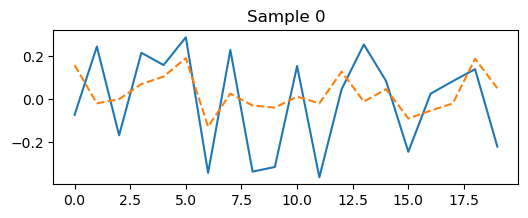

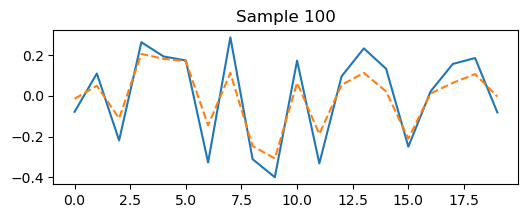

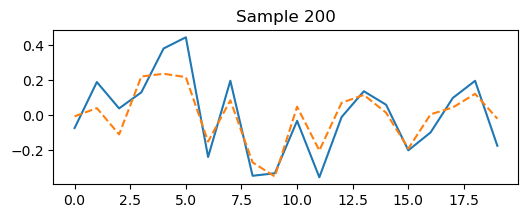

In [69]:
import matplotlib.pyplot as plt

# Select a few sample sequences
sample_indices = [0,100,200]  # Example indices
for idx in sample_indices:
    plt.figure(figsize=(6,2))
    plt.plot(target_tensor[0][idx].detach().numpy(), label='Target')
    plt.plot(output_tensor[0][idx].detach().numpy(), label='Prediction', linestyle='--')
    plt.title(f'Sample {idx}')
    # plt.legend()
    plt.show()


In [62]:
target_embedding = target_tensor.detach().numpy()
rnn_output_embedding = output_tensor.detach().numpy()
target_embedding.shape,rnn_output_embedding.shape

((278, 220, 20), (278, 220, 20))

In [63]:
# Reshape the array to (30580, 32)
rnn_output_embedding = rnn_output_embedding.reshape(-1, 20)
target_embedding = target_embedding.reshape(-1, 20)
rnn_output_embedding.shape, target_embedding.shape

((61160, 20), (61160, 20))

In [64]:
m1_embedding_train = cebra_time_train
m1_embedding_all = cebra_time_all
m1_embedding_all.shape, m1_embedding_train.shape

((61160, 20), (48928, 20))

Text(0.5, 0.98, 'M1 Vs. Rnn embeddings')

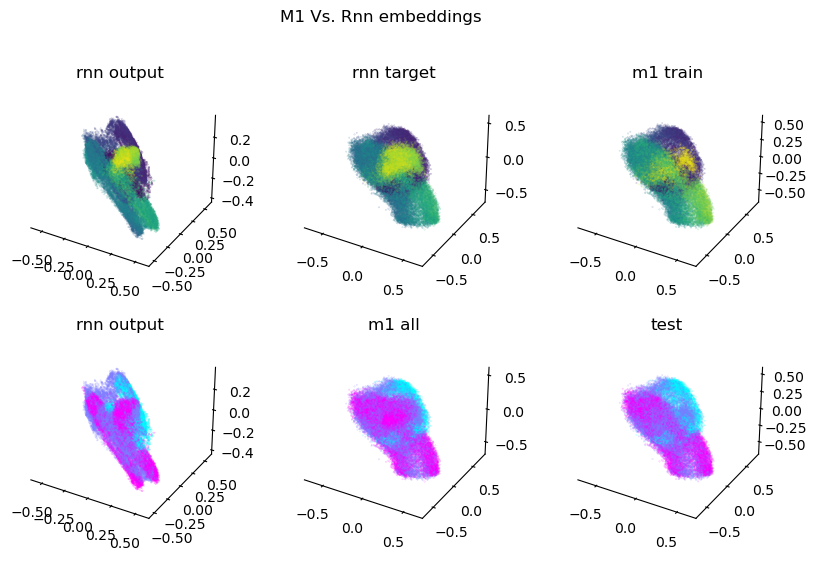

In [67]:
plt.figure(figsize=(10, 6))
#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(231, projection='3d')  # First row, first column
ax2 = plt.subplot(232, projection='3d')  # First row, second column
ax3 = plt.subplot(233, projection='3d')  # First row, second column
ax4 = plt.subplot(234, projection='3d')  # First row, second column
ax5 = plt.subplot(235, projection='3d')  # First row, second column
ax6 = plt.subplot(236, projection='3d')  # First row, second column

ax1 = cebra.plot_embedding(ax=ax1,embedding=rnn_output_embedding, embedding_labels='time', title='rnn output')
ax2 = cebra.plot_embedding(ax=ax2,embedding=target_embedding, embedding_labels='time', title='rnn target')
ax3 = cebra.plot_embedding(ax=ax3,embedding=m1_embedding_train, embedding_labels='time', title='m1 train')
ax4 = cebra.plot_embedding(ax=ax4,embedding=rnn_output_embedding, embedding_labels=discete_lables[:,0], title='rnn output')
ax5 = cebra.plot_embedding(ax=ax5,embedding=target_embedding, embedding_labels=discete_lables[:,0], title='m1 all')
ax6 = cebra.plot_embedding(ax=ax6,embedding=m1_embedding_train, embedding_labels=label_train[:,0], title='test')
# add title
plt.suptitle('M1 Vs. Rnn embeddings')

### 5. Decode lables from embeddings
- Decode lables (trial_ID, Success or Failure) from cebra embeddings
- Decode lables (trial_ID, Success or Failure) from RNN predicted embeddings

### 6. Pass real M1 embeddings cerebellar SNN
- See if SNN can predict when their is an error